In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
df=pd.read_csv('heart_disease.txt')

In [3]:
df.shape

(4238, 16)

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

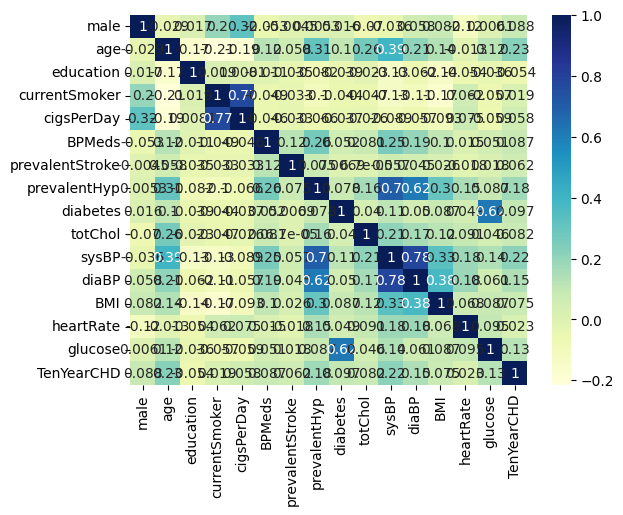

In [5]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [9]:
mean_cigsPerDay = round(df["cigsPerDay"].mean())
mean_BPmeds = round(df["BPMeds"].mean())
mean_totChol = round(df["totChol"].mean())
mean_BMI = round(df["BMI"].mean())
mean_glucose = round(df["glucose"].mean())
mean_heartRate = round(df["heartRate"].mean())

In [10]:
df['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
df['BPMeds'].fillna(mean_BPmeds, inplace = True)
df['totChol'].fillna(mean_totChol, inplace = True)
df['BMI'].fillna(mean_BMI, inplace = True)
df['glucose'].fillna(mean_glucose, inplace = True)
df['heartRate'].fillna(mean_heartRate, inplace = True)

In [11]:
df.shape

(4238, 16)

In [12]:
 df.drop(['education'], axis=1)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [13]:
df = df.drop(['education'], axis=1)
df = df.drop(['prevalentHyp'], axis=1)

In [14]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df.shape

(4238, 14)

In [22]:
x = df.iloc[:, :-1]
y = df.iloc[:, 13:]

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [25]:
lr = LogisticRegression(max_iter=50, l1_ratio=0.2)
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(l1_ratio=0.2, max_iter=50)

In [26]:
y_pred = lr.predict(x_test)

In [27]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[699,   9],
       [127,  13]])

In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.839622641509434


In [30]:
age = int(input("Enter Age "))
cigsPerDay = int(input("Enter Cigarette Consumption Per day "))
cholestrol = int(input("Enter Cholestrol(170-300 mg/dl) "))
sysBP = int(input("Enter Systolic BP(100 - 200 mmHg) "))
diaBP = int(input("Enter Diastolic BP(70 - 140 mmHg) "))
BMI = int(input("Enter BMI(14 - 35 kg/m2)"))  
heartRate = int(input("Enter Heart Rate(60-100 beats/min) "))
glucoseLevel = int(input("Enter Glucose Level(70-400 mg/dl) "))

presentSmoker = int(input("Enter present ur a Smoker or not(No-0, Yes-1): "))
gender = int(input("Enter Gender (Male - 1,Female - 0): "))
bpMedication = int(input("Do Patient take medication for BP(Yes - 1,No - 0)"))
prevalentStroke = int(input("Do patient have prevalent stroke (Yes - 1, No - 0)"))
diabetes = int(input("Do the patient is diabetic(Yes - 1,No - 0)"))

Enter Age 34
Enter Cigarette Consumption Per day 2
Enter Cholestrol(170-300 mg/dl) 234
Enter Systolic BP(100 - 200 mmHg) 44
Enter Diastolic BP(70 - 140 mmHg) 140
Enter BMI(14 - 35 kg/m2)22
Enter Heart Rate(60-100 beats/min) 99
Enter Glucose Level(70-400 mg/dl) 56
Enter present ur a Smoker or not(No-0, Yes-1): 0
Enter Gender (Male - 1,Female - 01
Do Patient take medication for BP(Yes - 1,No - 0)3
Do patient have prevalent stroke (Yes - 1, No - 0)4
Do the patient is diabetic(Yes - 1,No - 0)4


In [32]:
x2 = np.array([age,cigsPerDay, cholestrol, sysBP,diaBP, BMI,heartRate,glucoseLevel]).reshape(1, -1)
x2 = sc.fit_transform(x2)
bool1 = [gender, presentSmoker, bpMedication, prevalentStroke, diabetes]
x2 = np.append(x2, bool1).reshape(1,-1)
prediction = lr.predict(x2)

if prediction>0.5:
  print("You shuould Consult a doctor")
else:
  print("Your health! Stay Strong Stay Fit")

Your health! Stay Strong Stay Fit


In [33]:
pickle.dump(lr, open("heart.pkl", 'wb'))